# Embedding Layer
- Embedding 레이어는 단어 임베딩(Word Embedding)을 구현하는 데 사용
- 정수형 인덱스를 입력받아 임베딩 벡터를 반환하는 역할
- 단어를 실수 형태의 벡터로 표현
- 신경망에서 임베딩 레이어를 추가하여 단어 임베딩을 얻을 수 있음

## Embedding Layer 동작 과정
- 각 단어(토큰)를 정수 인덱스 변환후 임베딩 레이어에 전달해야 함

#### 1. 임베딩 레이어는 전달 받은 정수 인덱스를 원핫 벡터로 변환

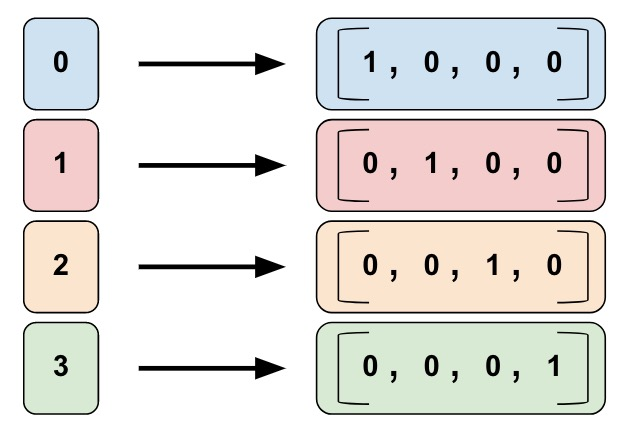

#### 2. 원핫 벡터와 임베딩 레이어의 가중치 행렬과 행렬 연산이 수행됨
- Lookup table 이라고도 함

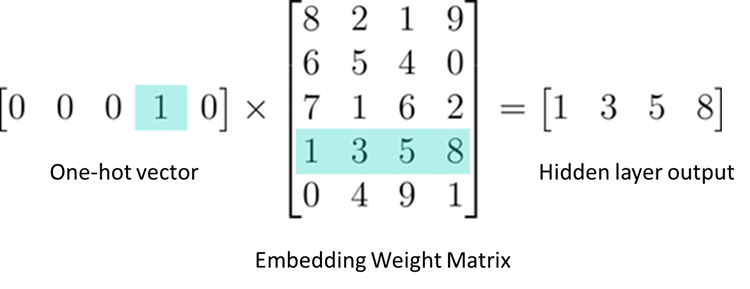

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [2]:
DATA_PATH = "../data/"
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
train = pd.read_csv(f"{DATA_PATH}train_news.csv")
test = pd.read_csv(f"{DATA_PATH}test_news.csv")

train.shape, test.shape

((89320, 3), (38280, 2))

# 텍스트 정제

In [4]:
train["clean"] = train["desc"].replace("[^\w ]+", "", regex=True).str.lower()
test["clean"] = test["desc"].replace("[^\w ]+", "", regex=True).str.lower()

1. 전체 문서들 토큰화
2. 어휘집 만들기
3. 토큰화 데이터의 모든 토큰들에 대해 어휘집을 이용해서 단어 번호 부여
4. 패딩 작업

# 토큰화

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kwon3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
from nltk.tokenize import word_tokenize

word_tokenize("sadfsa")

['sadfsa']

In [7]:
train_token = [word_tokenize(text) for text in train["clean"]]
test_token = [word_tokenize(text) for text in test["clean"]]

# 어휘집 클래스

In [8]:
tmp = set()

for tokens in train_token:
    tmp.update(tokens)

In [9]:
id2token = list(tmp)
id2token[0]

'tegel'

In [10]:
token2id = {t: i for i, t in enumerate(id2token)}
token2id["hello"]

45623